[]
[]


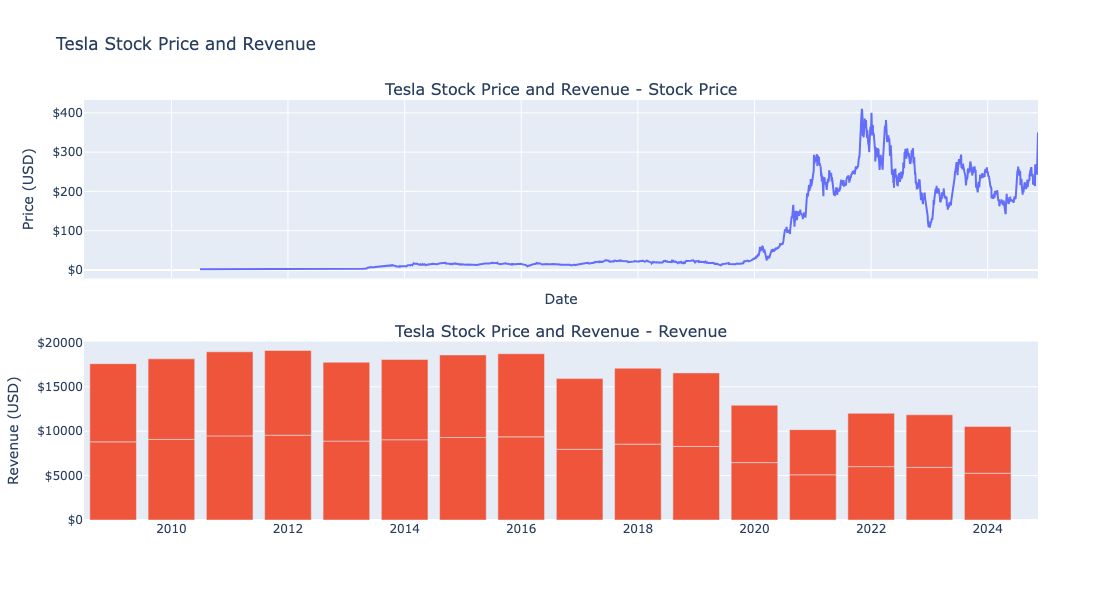

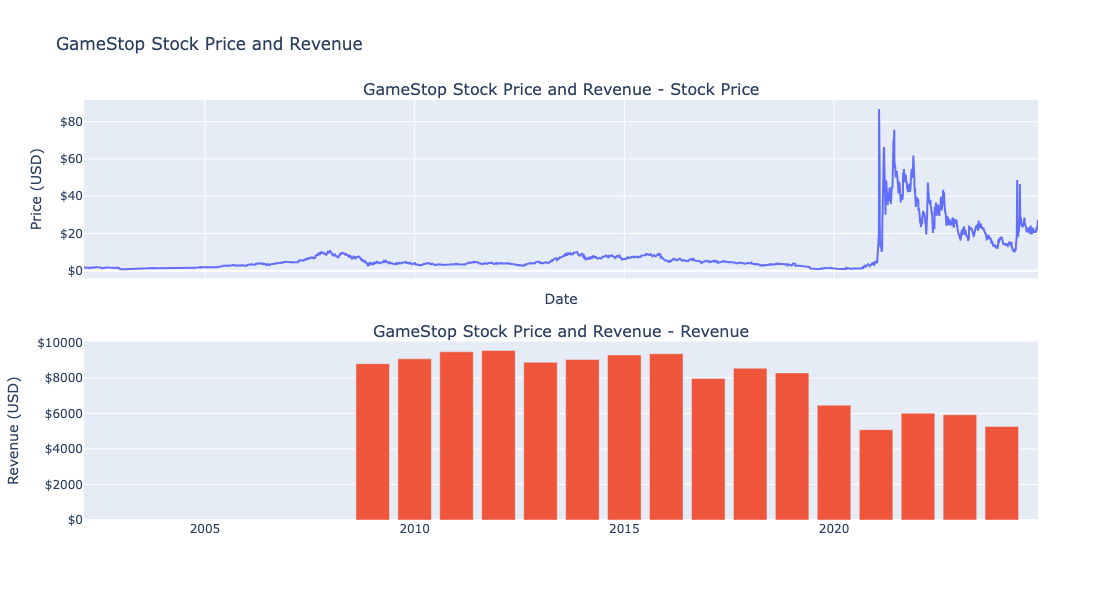

In [41]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly
!pip install yfinance
!pip install requests

import pandas as pd
import yfinance as yf
from pprint import pprint
import requests
import pandas as pd
from bs4 import BeautifulSoup

import plotly.graph_objects as go
from plotly.subplots import make_subplots

tesla_symbol = "TSLA"
tesla_ticker = yf.Ticker(tesla_symbol)
tesla_data = tesla_ticker.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm' 
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
rev_table = soup.find("table")
rev_data = []
pprint(rev_data)

GameStop_symbol = "GME"
GameStop_ticker = yf.Ticker(GameStop_symbol)
gme_data = GameStop_ticker.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36"
}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, 'html.parser')
rev_table = soup.find("table")
rev_data = []
pprint(rev_data)

for row in rev_table.find_all("tr")[1:]:
    columns = row.find_all("td")
    date = columns[0].text.strip()
    revenue = columns[1].text.strip()
    rev_data.append({"Date": date, "Revenue": revenue})
gme_revenue = pd.DataFrame(rev_data)
gme_revenue.tail()

for row in rev_table.find_all("tr")[1:]:
    columns = row.find_all("td")
    date = columns[0].text.strip()
    revenue = columns[1].text.strip()
    rev_data.append({"Date": date, "Revenue": revenue})
tesla_revenue = pd.DataFrame(rev_data)

def clean_revenue_data(revenue_df):
    revenue_df['Revenue'] = revenue_df['Revenue'].replace(r'[\$,]', '', regex=True).astype(float)
    revenue_df['Date'] = pd.to_datetime(revenue_df['Date'], format='%Y')  # Format dates by year
    return revenue_df

def make_graph(stock_data, revenue_data, title="Stock Price and Revenue Over Time"):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    
    revenue_data = clean_revenue_data(revenue_data)
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=(f"{title} - Stock Price", f"{title} - Revenue"),
                        vertical_spacing=0.15)
    
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], 
                             mode='lines', name="Stock Price"),
                  row=1, col=1)
    
    fig.add_trace(go.Bar(x=revenue_data['Date'], y=revenue_data['Revenue'],
                         name="Revenue"),
                  row=2, col=1)
    
    fig.update_layout(title=title, xaxis_title="Date", yaxis_title="Price (USD)",
                      yaxis2_title="Revenue (USD)", height=600, showlegend=False)
    
    fig.update_yaxes(tickformat="$", row=1, col=1)
    fig.update_yaxes(tickformat="$", row=2, col=1)
    
    fig.show()

make_graph(tesla_data, tesla_revenue, title="Tesla Stock Price and Revenue")

make_graph(gme_data, gme_revenue, title="GameStop Stock Price and Revenue")